In [1]:
import numpy as np
import pandas as pd 
import pickle
import matplotlib.pylab as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, LinearRegression




# Imports


In [2]:
# Pickles
scaler = pickle.load(open('./Pickle_jar/Scaler.pickle', 'rb'))
pca = pickle.load(open('./Pickle_jar/pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('./Pickle_jar/kmean_pca4', 'rb')) # we are using the PCA with 4 segments or 'kmean_pca4'

# Dataset
df_purchase = pd.read_csv('./Datasets/purchase data.csv')

# Prep

In [3]:
#Standarization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']] # These are the same features as in the segmentation part
df_purchase_segm_std = scaler.transform(features)
#PCA application
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
#Kmean segment predictions
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

# Dataframe copy
df_purchase_predictors = df_purchase.copy()
#segment labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep='_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis= 1)

# Dataset for analysis
df_pa = df_purchase_predictors # same datasat but we will use the predictions for price analysis


/opt/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/opt/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/opt/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


# Purchase Probability Model

In [4]:
y = df_pa['Incidence']

Time to set the reference price for the cocolates. The price of chocolate varies by brand, by promotion, etc. Therefore, we need to select one based on what makes more sence for the analysis at hand. In this case we could take a max, a min, median or a fixed price stablish by the company. In this case we will use the average price of the brand as our reference price.

In [5]:
# Average price of every brand
x = pd.DataFrame()
x['Price'] = (df_pa['Price_1'] +
              df_pa['Price_2'] +
              df_pa['Price_3'] +
              df_pa['Price_4'] + 
              df_pa['Price_5'] )/5


In [6]:
model_purchase = LogisticRegression(solver= 'sag') # sag optimal for simple problems in large datasets
model_purchase.fit(x,y)

LogisticRegression(solver='sag')

In [7]:
model_purchase.coef_

array([[-2.34694364]])

Based on the model, by every aditional unit of price, the pruchase probability descreases -2.34

# Price Elasticity of Purchase Probability
n% change in Purchase probability for very 1% change in price

In [8]:
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [9]:
price_range = np.arange(0.5,3.5,0.01) # from 0.5 to 3.5 increasing by 1 cent 
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [10]:
df_price_range = pd.DataFrame(price_range)
df_price_range

,0
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [11]:
y_pr =  model_purchase.predict_proba(df_price_range)
y_pr

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.08205801, 0.91794199],
       [0.08384326, 0.91615674],
       [0.08566373, 0.91433627],
       [0.08751995, 0.91248005],
       [0.08941246, 0.91058754],
       [0.09134179, 0.90865821],
       [0.09330849, 0.90669151],
       [0.0953131 , 0.9046869 ],
       [0.09735614, 0.90264386],
       [0.09943817, 0.90056183],
       [0.10155971, 0.89844029],
       [0.1037213 , 0.8962787 ],
       [0.10592347, 0.89407653],
       [0.10816676, 0.89183324],
       [0.11045169, 0.88954831],
       [0.11277878, 0.88722122],
       [0.11514855, 0.88485145],
       [0.11756152, 0.88243848],
       [0.12001819, 0.87998181],
       [0.12251908, 0.87748092],
       [0.12506467, 0.87493533],
       [0.12765546, 0.87234454],
       [0.13029192, 0.86970808],
       [0.13297454, 0.86702546],
       [0.13570377, 0.86429623],
       [0.13848006, 0.86151994],
       [0.14130388, 0.85869612],
       [0.14417563, 0.85582437],
       [0.14709575, 0.85290425],
       [0.15006465, 0.84993535],
       [0.

## Purchase Probability 
in price range (low to high)

In [12]:
purchase_pr = y_pr[:,1] #all row, second column (1p)
purchase_pr

array([0.91794199, 0.91615674, 0.91433627, 0.91248005, 0.91058754,
       0.90865821, 0.90669151, 0.9046869 , 0.90264386, 0.90056183,
       0.89844029, 0.8962787 , 0.89407653, 0.89183324, 0.88954831,
       0.88722122, 0.88485145, 0.88243848, 0.87998181, 0.87748092,
       0.87493533, 0.87234454, 0.86970808, 0.86702546, 0.86429623,
       0.86151994, 0.85869612, 0.85582437, 0.85290425, 0.84993535,
       0.84691729, 0.84384968, 0.84073215, 0.83756437, 0.834346  ,
       0.83107672, 0.82775624, 0.82438428, 0.82096059, 0.81748493,
       0.81395709, 0.81037687, 0.80674412, 0.80305868, 0.79932044,
       0.79552932, 0.79168524, 0.78778816, 0.78383809, 0.77983504,
       0.77577907, 0.77167025, 0.76750871, 0.76329458, 0.75902804,
       0.75470932, 0.75033866, 0.74591634, 0.74144268, 0.73691803,
       0.73234278, 0.72771737, 0.72304225, 0.71831793, 0.71354495,
       0.70872389, 0.70385537, 0.69894004, 0.69397859, 0.68897177,
       0.68392034, 0.67882512, 0.67368694, 0.66850671, 0.66328

# Elasticity
$E = \beta * \text{price} * \left(1 - P(\text{purchase})\right)$

In [13]:
pe = model_purchase.coef_[:,0] * price_range * (1-purchase_pr)

# Alternative #
# beta = model_purchase.coef_[:,0] # in this case -2.34749086
# price = price_range
# prob = (1-purchase_pr) 

# pe = beta*price*prob


In [14]:
df_price_elasticities = pd.DataFrame(price_range) #we use price range as ID


In [15]:
df_price_elasticities = df_price_elasticities.rename(columns={0:'Price points'})
df_price_elasticities['Mean PE'] = pe

In [16]:
# pd.options.display.max_rows = None
df_price_elasticities

,Price points,Mean PE
0,0.50,-0.096293
1,0.51,-0.100355
2,0.52,-0.104545
3,0.53,-0.108864
4,0.54,-0.113317
...,...,...
295,3.45,-8.008764
296,3.46,-8.034007
297,3.47,-8.059216
298,3.48,-8.084392


Text(0.5, 1.0, 'Price Elasticity of Pruchase Probability')

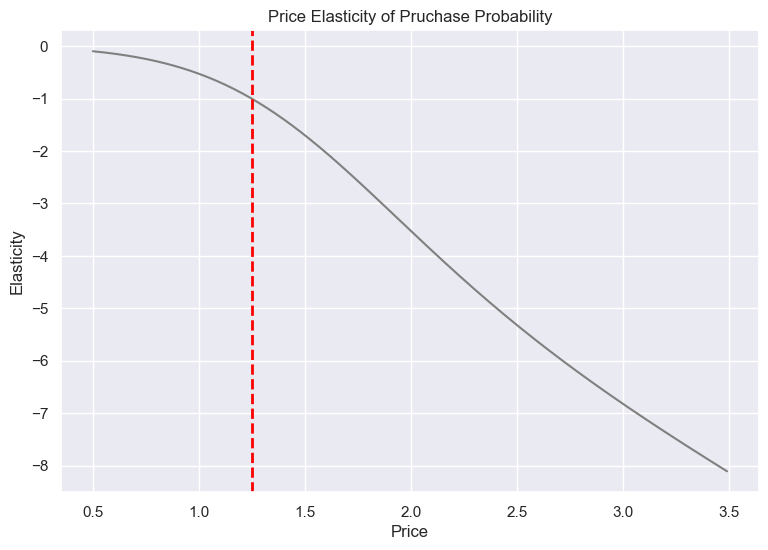

In [17]:
plt.figure(figsize=(9,6))
plt.plot(price_range, pe, color= 'grey')
plt.axvline(x=1.25, color='red', linestyle='--', linewidth=2)
# plt.axhline(y=-1, color='red', linestyle='--', linewidth=2)

plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Pruchase Probability')



For products priced below 1.25 dollars, the pruchase probability of chocolate bars are inelastic. meaning we can increase the price without dramastically affect the purchase probability.
For products priced above 1.25 dollars, the purchase probability of chocolate bars becomes elastic, meaning that if we increase the price of the product we will see a decreate in the pruchase pribability.

as examples:

at $1.10, the increase in 1% in price will DECREASE the purchase probability by 0.69%
at $1.50, the increase in 1% in price will DECREASE the pruchase probability by 1.75%

at price 1.25, the increase in 1% in price will DECREASE the pruchase probability by 1.00%




# Purchase Porbability by Segment 
`Low-Opportunities`,`Standard Fam`,`Workaholics`,`Well-Off`


## Segment 0 - Low-Opportunities

In [18]:
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]

In [19]:
y = df_pa_segment_0['Incidence']

In [20]:
x = pd.DataFrame()

x['Mean Price'] = (df_pa_segment_0['Price_1'] +
                   df_pa_segment_0['Price_2'] +
                   df_pa_segment_0['Price_3'] +
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5'] )/5

In [21]:
model_incidence_segm_0 = LogisticRegression(solver= 'sag')
model_incidence_segm_0.fit(x,y)


LogisticRegression(solver='sag')

In [22]:
model_incidence_segm_0.coef_

array([[-2.67226921]])

In [23]:
y_segm_0 =  model_incidence_segm_0.predict_proba(df_price_range)
purchase_pr_segm_0 = y_segm_0 [:,1] #all row, second column (1p)
pe_segm_0 = model_incidence_segm_0.coef_[:,0] * price_range * (1-purchase_pr_segm_0)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
df_price_elasticities['PE Segment 0'] = pe_segm_0

## Segment 1 - Standard Fam

In [25]:
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [26]:
y = df_pa_segment_1['Incidence']

In [27]:
x = pd.DataFrame()

x['Mean Price'] = (df_pa_segment_1['Price_1'] +
                   df_pa_segment_1['Price_2'] +
                   df_pa_segment_1['Price_3'] +
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5'] )/5

In [28]:
model_incidence_segm_1 = LogisticRegression(solver= 'sag')
model_incidence_segm_1.fit(x,y)


LogisticRegression(solver='sag')

In [29]:
model_incidence_segm_1.coef_

array([[-1.67095289]])

In [30]:
y_segm_1 =  model_incidence_segm_1.predict_proba(df_price_range)
purchase_pr_segm_1 = y_segm_1 [:,1] #all row, second column (1p)
pe_segm_1 = model_incidence_segm_1.coef_[:,0] * price_range * (1-purchase_pr_segm_1)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [31]:
df_price_elasticities['PE Segment 1'] = pe_segm_1

## Segment 2 - Workaholics

In [32]:
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

In [33]:
y = df_pa_segment_2['Incidence']

In [34]:
x = pd.DataFrame()

x['Mean Price'] = (df_pa_segment_2['Price_1'] +
                   df_pa_segment_2['Price_2'] +
                   df_pa_segment_2['Price_3'] +
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5'] )/5

In [35]:
model_incidence_segm_2 = LogisticRegression(solver= 'sag')
model_incidence_segm_2.fit(x,y)


LogisticRegression(solver='sag')

In [36]:
model_incidence_segm_2.coef_

array([[-2.44743925]])

In [37]:
y_segm_2 =  model_incidence_segm_2.predict_proba(df_price_range)
purchase_pr_segm_2 = y_segm_2 [:,1] #all row, second column (1p)
pe_segm_2 = model_incidence_segm_2.coef_[:,0] * price_range * (1-purchase_pr_segm_2)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
df_price_elasticities['PE Segment 2'] = pe_segm_2

## Segment 3 - Well-Off

In [39]:
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]

In [40]:
y = df_pa_segment_3['Incidence']

In [41]:
x = pd.DataFrame()

x['Mean Price'] = (df_pa_segment_3['Price_1'] +
                   df_pa_segment_3['Price_2'] +
                   df_pa_segment_3['Price_3'] +
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5'] )/5

In [42]:
model_incidence_segm_3 = LogisticRegression(solver= 'sag')
model_incidence_segm_3.fit(x,y)


LogisticRegression(solver='sag')

In [43]:
model_incidence_segm_3.coef_

array([[-1.41690965]])

In [44]:
y_segm_3 =  model_incidence_segm_3.predict_proba(df_price_range)
purchase_pr_segm_3 = y_segm_3 [:,1] #all row, second column (1p)
pe_segm_3 = model_incidence_segm_3.coef_[:,0] * price_range * (1-purchase_pr_segm_3)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [45]:
df_price_elasticities['PE Segment 3'] = pe_segm_3
df_price_elasticities

,Price points,Mean PE,PE Segment 0,PE Segment 1,PE Segment 2,PE Segment 3
0,0.50,-0.096293,-0.090957,-0.178803,-0.075453,-0.159548
1,0.51,-0.100355,-0.095114,-0.184786,-0.078749,-0.164533
2,0.52,-0.104545,-0.099417,-0.190886,-0.082154,-0.169602
3,0.53,-0.108864,-0.103872,-0.197106,-0.085671,-0.174756
4,0.54,-0.113317,-0.108483,-0.203446,-0.089304,-0.179996
...,...,...,...,...,...,...
295,3.45,-8.008764,-9.171989,-5.615645,-8.350661,-4.643889
296,3.46,-8.034007,-9.199820,-5.634338,-8.377096,-4.660629
297,3.47,-8.059216,-9.227625,-5.653006,-8.403492,-4.677346
298,3.48,-8.084392,-9.255406,-5.671651,-8.429848,-4.694040


Text(0.5, 1.0, 'Price Elasticity of Pruchase Probability')

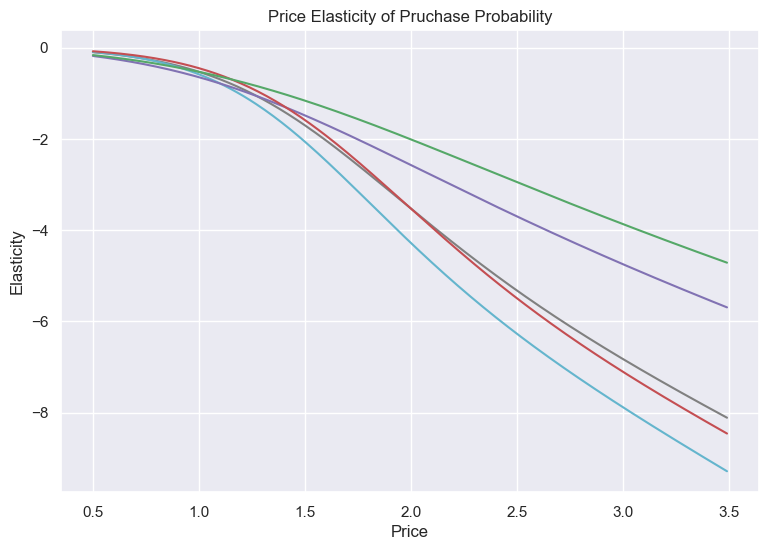

In [46]:
plt.figure(figsize=(9,6))
plt.plot(price_range, pe, color= 'grey')
plt.plot(price_range, pe_segm_0, color= 'c')
plt.plot(price_range, pe_segm_1, color= 'm')
plt.plot(price_range, pe_segm_2, color= 'r')
plt.plot(price_range, pe_segm_3, color= 'g')

plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Pruchase Probability')

# Purchase Probability with Promotion 

In [47]:
y = df_pa['Incidence']

In [48]:
x = pd.DataFrame()
x['Mean Price'] = (df_pa['Price_1'] +
              df_pa['Price_2'] +
              df_pa['Price_3'] +
              df_pa['Price_4'] + 
              df_pa['Price_5'] )/5

In [49]:
x['Mean Promotion'] = (df_pa['Promotion_1']+ df_pa['Promotion_2']+ df_pa['Promotion_3']+ df_pa['Promotion_4']+ df_pa['Promotion_5'] )/5
x

,Mean Price,Mean Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0
...,...,...
58688,2.060,0.2
58689,2.060,0.0
58690,2.086,0.0
58691,2.092,0.0


In [50]:
model_incidence_promo = LogisticRegression(solver= 'sag')
model_incidence_promo.fit(x,y)
model_incidence_promo.coef_

array([[-1.49396503,  0.5615293 ]])

# Price Elasticity case of Promotion

## with Promotion

In [51]:
df_price_elasticity_promo = pd.DataFrame(price_range, columns=['Mean Price']) #using price as index
df_price_elasticity_promo = df_price_elasticity_promo.rename(columns={0:'Price Range'})

In [52]:
df_price_elasticity_promo['Mean Promotion'] = 1

In [53]:
y_promotion = model_incidence_promo.predict_proba(df_price_elasticity_promo)

In [54]:
promo = y_promotion[:,1]
price_elasticity_promo = model_incidence_promo.coef_[:,0] * price_range * (1-promo)

In [55]:
df_price_elasticities['Elasticity Promotion 1'] = price_elasticity_promo

## Without promo


In [56]:
df_price_elasticity_promo_no = pd.DataFrame(price_range, columns=['Mean Price']) #using price as index
df_price_elasticity_promo_no = df_price_elasticity_promo_no.rename(columns={0:'Price Range'})

In [57]:
df_price_elasticity_promo_no['Mean Promotion'] = 0

In [58]:
y_no_promotion = model_incidence_promo.predict_proba(df_price_elasticity_promo_no)

In [59]:
promo = y_no_promotion[:,1]
price_elasticity_nopromo = model_incidence_promo.coef_[:,0] * price_range * (1 - promo)


In [60]:
df_price_elasticities['Elasticity Promotion 0'] = price_elasticity_nopromo
df_price_elasticities

,Price points,Mean PE,PE Segment 0,PE Segment 1,PE Segment 2,PE Segment 3,Elasticity Promotion 1,Elasticity Promotion 0
0,0.50,-0.096293,-0.090957,-0.178803,-0.075453,-0.159548,-0.125746,-0.195663
1,0.51,-0.100355,-0.095114,-0.184786,-0.078749,-0.164533,-0.129862,-0.201785
2,0.52,-0.104545,-0.099417,-0.190886,-0.082154,-0.169602,-0.134057,-0.208009
3,0.53,-0.108864,-0.103872,-0.197106,-0.085671,-0.174756,-0.138333,-0.214336
4,0.54,-0.113317,-0.108483,-0.203446,-0.089304,-0.179996,-0.142689,-0.220768
...,...,...,...,...,...,...,...,...
295,3.45,-8.008764,-9.171989,-5.615645,-8.350661,-4.643889,-4.861423,-4.983033
296,3.46,-8.034007,-9.199820,-5.634338,-8.377096,-4.660629,-4.879624,-4.999939
297,3.47,-8.059216,-9.227625,-5.653006,-8.403492,-4.677346,-4.897794,-5.016824
298,3.48,-8.084392,-9.255406,-5.671651,-8.429848,-4.694040,-4.915934,-5.033690


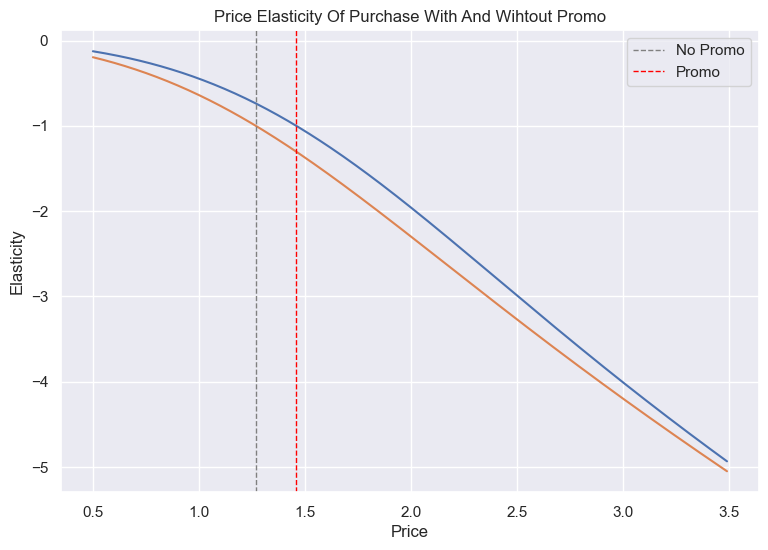

In [61]:
plt.figure(figsize=(9,6))
plt.plot(price_range,price_elasticity_promo)
plt.plot(price_range,price_elasticity_nopromo)
plt.axvline(x=1.27, color='grey', linestyle='--', linewidth=1, label= 'No Promo')
plt.axvline(x=1.46, color='red', linestyle='--', linewidth=1, label= 'Promo')

plt.title('Price Elasticity of purchase with and wihtout promo'.title())
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.legend()



This image shows purchase probability elasticity behaves under two conditions min and max condition of promotion (whether a promotion is present or not):

The purchase probability becomes consistently more price-sensitive (elastic) when promotions are active but the elastic threshold shifts significantly based on promotional status:

* Without promotion: Price exceeds $1.27

* With promotion: Price exceeds $1.46

This $0.19 buffer means promotions reduce price sensitivity in the $1.27-$1.46 range. For example, at a $1.50 price point:

* Without promotion: Demand is elastic (price changes strongly affect sales)

* With promotion: Reducing price to $1.30 keeps demand inelastic (price changes have minimal impact according to the model)

In other words: Maintain higher base prices and keeping a recurrent promotions rather than permanent low pricing can drive purhcases.

# Brand Choise (Multinomial Logistic)

In [62]:
brand_choice = df_pa[df_pa['Incidence'] == 1]


In [63]:
# pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,False,False,True,False
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,False,False,True,False
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,False,False,True,False
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,False,False,True,False
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,2,False,False,True,False
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,2,False,False,True,False
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,2,False,False,True,False
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,2,False,False,True,False


In [64]:
y = brand_choice['Brand'] # we have 5 possible brand going from 1-5 (brand 0 or no brand is already filtered out)

In [65]:
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [66]:
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4','Price_5']
x = brand_choice[features]



In [67]:
model_brand_choice = LogisticRegression(solver = 'sag', multi_class='multinomial')
model_brand_choice.fit(x,y)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [68]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915961,0.658458,2.417701,0.704082,-0.202115
1,1.274614,-1.879855,-0.212633,-0.206340,0.587874
2,1.624185,0.562108,0.500862,1.039508,0.452783
3,0.574540,0.395589,-1.400592,-1.246243,0.249355
4,0.442622,0.263699,-1.305339,-0.291007,-1.087897


In [69]:
#Making Coef more visual - Cross Band Effect
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef Brand 1','Coef Brand 2','Coef Brand 3','Coef Brand 4','Coef Brand 5']
prices = ['Price 1','Price 2','Price 3','Price 4','Price 5']

bc_coef.columns = coefficients
bc_coef.index = prices
bc_coef = bc_coef.round(2)

bc_coef

,Coef Brand 1,Coef Brand 2,Coef Brand 3,Coef Brand 4,Coef Brand 5
Price 1,-3.92,1.27,1.62,0.57,0.44
Price 2,0.66,-1.88,0.56,0.40,0.26
Price 3,2.42,-0.21,0.50,-1.40,-1.31
Price 4,0.70,-0.21,1.04,-1.25,-0.29
Price 5,-0.20,0.59,0.45,0.25,-1.09


In Band 1, the coefficient for each brand’s own price is negative, indicating that as a brand increases its own price, the probability of a customer choosing that brand decreases (which is expected) In contrast, the coefficients with respect to competitor prices are generally positive, meaning that as competitor prices increase, the likelihood of a customer switching to our brand 1 increases.

This relationship reflects standard consumer behavior: when a competitor becomes more expensive, our brand becomes relatively more attractive.

## Own Price Elsticity for Brand 5

In [70]:
df_own_brand_5 = pd.DataFrame(index= np.arange(price_range.size)) 
df_own_brand_5['Price_1'] =  brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] =  brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] =  brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] =  brand_choice['Price_4'].mean()
#we range for our own price
df_own_brand_5['Price_5'] =  price_range
df_own_brand_5


,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [71]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [72]:
pr_own_brand_5 = predict_brand_5[:,4]

In [73]:
beta5 = bc_coef.iloc[-1,-1] #(-1.09)


In [74]:
own_price_elasticity_5  = beta5* price_range*(1-pr_own_brand_5)

In [75]:
df_price_elasticities['Brand_5'] = own_price_elasticity_5
df_price_elasticities

,Price points,Mean PE,PE Segment 0,PE Segment 1,PE Segment 2,PE Segment 3,Elasticity Promotion 1,Elasticity Promotion 0,Brand_5
0,0.50,-0.096293,-0.090957,-0.178803,-0.075453,-0.159548,-0.125746,-0.195663,-0.049056
1,0.51,-0.100355,-0.095114,-0.184786,-0.078749,-0.164533,-0.129862,-0.201785,-0.050617
2,0.52,-0.104545,-0.099417,-0.190886,-0.082154,-0.169602,-0.134057,-0.208009,-0.052207
3,0.53,-0.108864,-0.103872,-0.197106,-0.085671,-0.174756,-0.138333,-0.214336,-0.053827
4,0.54,-0.113317,-0.108483,-0.203446,-0.089304,-0.179996,-0.142689,-0.220768,-0.055478
...,...,...,...,...,...,...,...,...,...
295,3.45,-8.008764,-9.171989,-5.615645,-8.350661,-4.643889,-4.861423,-4.983033,-3.231573
296,3.46,-8.034007,-9.199820,-5.634338,-8.377096,-4.660629,-4.879624,-4.999939,-3.247767
297,3.47,-8.059216,-9.227625,-5.653006,-8.403492,-4.677346,-4.897794,-5.016824,-3.263928
298,3.48,-8.084392,-9.255406,-5.671651,-8.429848,-4.694040,-4.915934,-5.033690,-3.280058


Text(0.5, 1.0, 'Own Brand Elasticity For Brand 5')

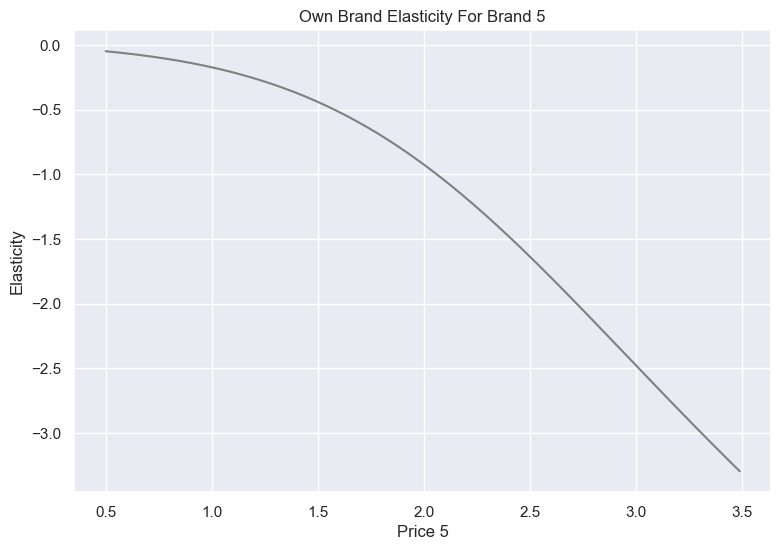

In [76]:
plt.figure(figsize= (9,6))
plt.plot(price_range,own_price_elasticity_5,color='grey')

plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own brand elasticity for brand 5'.title())

## Cross Price Elasticity for Brand 4

In [77]:
df_brand5_cross_brand4 = pd.DataFrame(index= np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

df_brand5_cross_brand4


,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,3.45,2.654296
296,1.384559,1.764717,2.006694,3.46,2.654296
297,1.384559,1.764717,2.006694,3.47,2.654296
298,1.384559,1.764717,2.006694,3.48,2.654296


In [78]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


$Cross price Elasticity = -\beta(own price) * \text{price}(cross brand) * \text{price}(cross brand)$

In [79]:
pr_brand_4 = predict_brand5_cross_brand4[:,3]

In [80]:
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4


In [81]:
df_price_elasticities['Brand_5_Cross_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price points,Mean PE,PE Segment 0,PE Segment 1,PE Segment 2,PE Segment 3,Elasticity Promotion 1,Elasticity Promotion 0,Brand_5,Brand_5_Cross_4
0,0.50,-0.096293,-0.090957,-0.178803,-0.075453,-0.159548,-0.125746,-0.195663,-0.049056,0.332011
1,0.51,-0.100355,-0.095114,-0.184786,-0.078749,-0.164533,-0.129862,-0.201785,-0.050617,0.337287
2,0.52,-0.104545,-0.099417,-0.190886,-0.082154,-0.169602,-0.134057,-0.208009,-0.052207,0.342507
3,0.53,-0.108864,-0.103872,-0.197106,-0.085671,-0.174756,-0.138333,-0.214336,-0.053827,0.347668
4,0.54,-0.113317,-0.108483,-0.203446,-0.089304,-0.179996,-0.142689,-0.220768,-0.055478,0.352773
...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.008764,-9.171989,-5.615645,-8.350661,-4.643889,-4.861423,-4.983033,-3.231573,0.162234
296,3.46,-8.034007,-9.199820,-5.634338,-8.377096,-4.660629,-4.879624,-4.999939,-3.247767,0.160334
297,3.47,-8.059216,-9.227625,-5.653006,-8.403492,-4.677346,-4.897794,-5.016824,-3.263928,0.158448
298,3.48,-8.084392,-9.255406,-5.671651,-8.429848,-4.694040,-4.915934,-5.033690,-3.280058,0.156577


In [82]:
# with pd.option_context('display.max_row',None):
#     display(df_price_elasticities[['Price points','Brand_5', 'Brand_5_Cross_4']])

$|E(Cross Brand)| > 0 $ <--- Indicative that the Copetitor's product is a Substitute for our product.

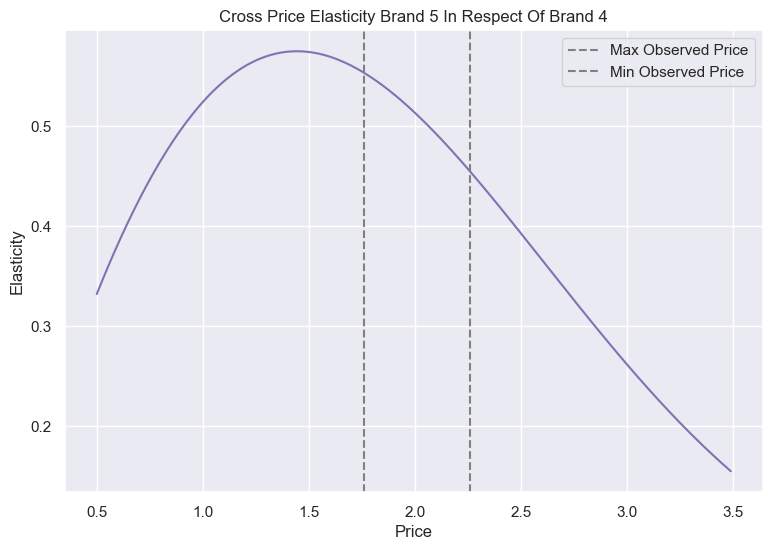

In [83]:
plt.figure(figsize= (9,6))
plt.plot(price_range,brand5_cross_brand4_price_elasticity, color='m')
plt.axvline(x= 1.76, color= 'grey', linestyle= '--', label= 'Max Observed Price')
plt.axvline(x= 2.26, color= 'grey', linestyle= '--', label= 'Min Observed Price')

plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Cross price elasticity brand 5 in respect of brand 4'.title())
plt.legend()

The pricerange for brand 4 ranges from 1.77 to 2.26, and as the price of brand 4 increases, more consumers tend to shift toward brand 5. However, while brand 5 continues to benefit from the price increase, the effect becomes less strong over time. People still switch, just at a slower rate. Importantly, the impact always remains positive for brand 5.




$|E(Cross Brand)| > |E(Own Price)|$ <--- indicative of a strong subsitute

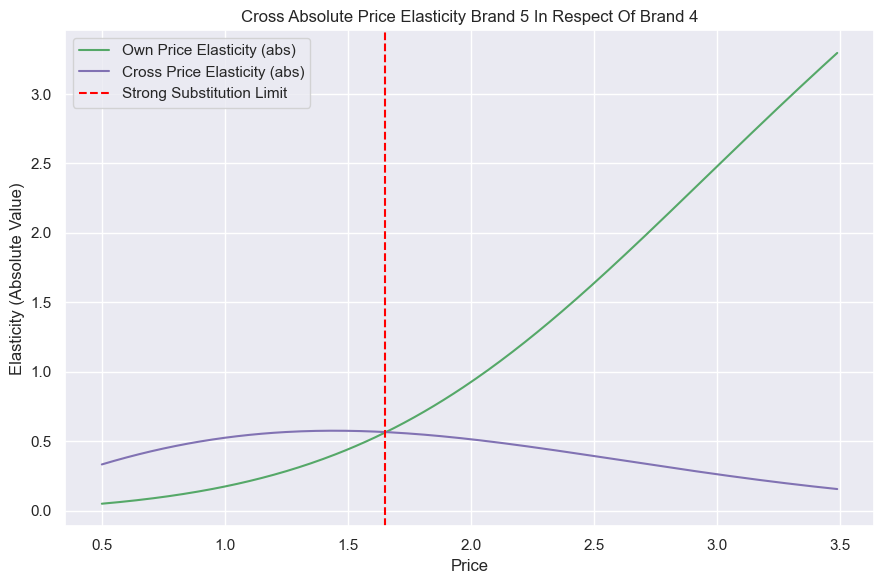

In [84]:
# Absolute value to elasticities
plt.figure(figsize= (9,6))
plt.plot(price_range, np.abs(own_price_elasticity_5), color='g', label='Own Price Elasticity (abs)')
plt.plot(price_range, np.abs(brand5_cross_brand4_price_elasticity), color='m', label='Cross Price Elasticity (abs)')
plt.axvline(x=1.65, color="red", linestyle='--', label='Strong Substitution Limit ')

plt.xlabel('Price')
plt.ylabel('Elasticity (Absolute Value)')
plt.title('Cross Absolute Price Elasticity Brand 5 In Respect Of Brand 4')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

When comparing the elasticity in absolute terms, brand 4 is a strong substitute for product 5 in all prices up to $1.65

This price falls under then normal/average price points for both products, but this can tell us tha in the case that brand 4 has a substantial discaunt, we would have a very strong competitor for brand 5.

## Cross Brand Elasticity Brand 2 

In [85]:
df_brand5_cross_brand2 = pd.DataFrame(index= np.arange(price_range.size))
df_brand5_cross_brand2['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand2['Price_2'] = price_range
df_brand5_cross_brand2['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand2['Price_4'] = brand_choice['Price_4'].mean()
df_brand5_cross_brand2['Price_5'] = brand_choice['Price_5'].mean()

df_brand5_cross_brand2


,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,0.50,2.006694,2.159658,2.654296
1,1.384559,0.51,2.006694,2.159658,2.654296
2,1.384559,0.52,2.006694,2.159658,2.654296
3,1.384559,0.53,2.006694,2.159658,2.654296
4,1.384559,0.54,2.006694,2.159658,2.654296
...,...,...,...,...,...
295,1.384559,3.45,2.006694,2.159658,2.654296
296,1.384559,3.46,2.006694,2.159658,2.654296
297,1.384559,3.47,2.006694,2.159658,2.654296
298,1.384559,3.48,2.006694,2.159658,2.654296


In [86]:
predict_brand5_cross_brand2 = model_brand_choice.predict_proba(df_brand5_cross_brand2)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


$Cross price Elasticity = -\beta(own price) * \text{price}(cross brand) * \text{price}(cross brand)$

In [87]:
pr_brand_2 = predict_brand5_cross_brand2[:,1]

In [88]:
brand5_cross_brand2_price_elasticity = -beta5 * price_range * pr_brand_2


In [89]:
df_price_elasticities['Brand_5_Cross_2'] = brand5_cross_brand2_price_elasticity
df_price_elasticities

,Price points,Mean PE,PE Segment 0,PE Segment 1,PE Segment 2,PE Segment 3,Elasticity Promotion 1,Elasticity Promotion 0,Brand_5,Brand_5_Cross_4,Brand_5_Cross_2
0,0.50,-0.096293,-0.090957,-0.178803,-0.075453,-0.159548,-0.125746,-0.195663,-0.049056,0.332011,0.481450
1,0.51,-0.100355,-0.095114,-0.184786,-0.078749,-0.164533,-0.129862,-0.201785,-0.050617,0.337287,0.489790
2,0.52,-0.104545,-0.099417,-0.190886,-0.082154,-0.169602,-0.134057,-0.208009,-0.052207,0.342507,0.498056
3,0.53,-0.108864,-0.103872,-0.197106,-0.085671,-0.174756,-0.138333,-0.214336,-0.053827,0.347668,0.506247
4,0.54,-0.113317,-0.108483,-0.203446,-0.089304,-0.179996,-0.142689,-0.220768,-0.055478,0.352773,0.514361
...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.008764,-9.171989,-5.615645,-8.350661,-4.643889,-4.861423,-4.983033,-3.231573,0.162234,0.035875
296,3.46,-8.034007,-9.199820,-5.634338,-8.377096,-4.660629,-4.879624,-4.999939,-3.247767,0.160334,0.035172
297,3.47,-8.059216,-9.227625,-5.653006,-8.403492,-4.677346,-4.897794,-5.016824,-3.263928,0.158448,0.034482
298,3.48,-8.084392,-9.255406,-5.671651,-8.429848,-4.694040,-4.915934,-5.033690,-3.280058,0.156577,0.033805


In [90]:
# with pd.option_context('display.max_row',None):
#     display(df_price_elasticities[['Price points','Brand_5', 'Brand_5_Cross_2']])

$|E(Cross Brand)| > 0 $ <--- Indicative that the Copetitor's product is a Substitute for our product.

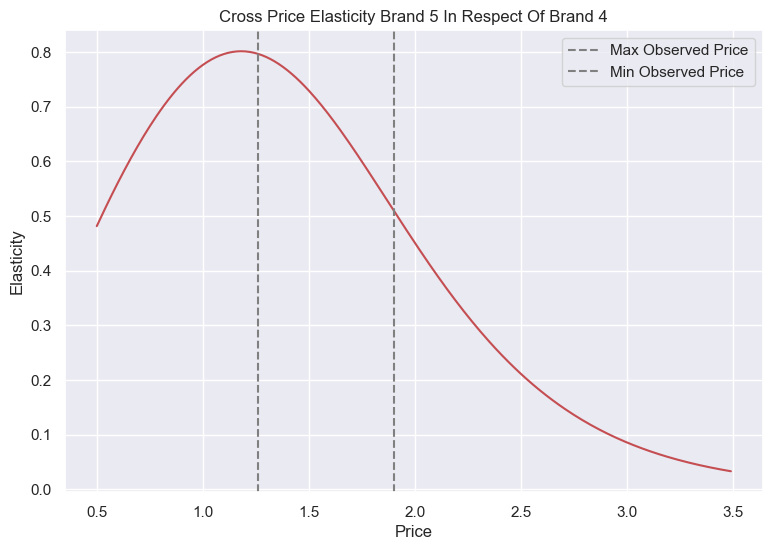

In [91]:
plt.figure(figsize= (9,6))
plt.plot(price_range,brand5_cross_brand2_price_elasticity, color='r')
plt.axvline(x= 1.26, color= 'grey', linestyle= '--', label= 'Max Observed Price')
plt.axvline(x= 1.90, color= 'grey', linestyle= '--', label= 'Min Observed Price')

plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Cross price elasticity brand 5 in respect of brand 4'.title())
plt.legend()

The pricerange for brand 2 ranges from 1.26 to 1.9, and as the price of brand 2 increases, more consumers tend to shift toward brand 5. However, while brand 5 continues to benefit from the price increase, the effect becomes less strong over time. People still switch, just at a VERY slower rate. Importantly, the impact always remains positive for brand 5.




$|E(Cross Brand)| > |E(Own Price)|$ <--- indicative of a strong subsitute

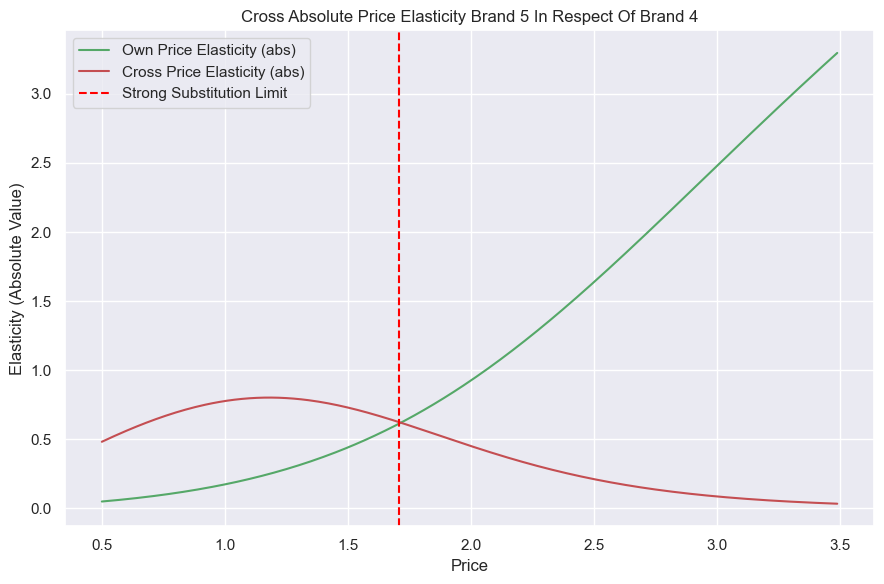

In [92]:
# Absolute value to elasticities
plt.figure(figsize= (9,6))
plt.plot(price_range, np.abs(own_price_elasticity_5), color='g', label='Own Price Elasticity (abs)')
plt.plot(price_range, np.abs(brand5_cross_brand2_price_elasticity), color='r', label='Cross Price Elasticity (abs)')
plt.axvline(x=1.71, color="red", linestyle='--', label='Strong Substitution Limit ')

plt.xlabel('Price')
plt.ylabel('Elasticity (Absolute Value)')
plt.title('Cross Absolute Price Elasticity Brand 5 In Respect Of Brand 4')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The data shows that Brand 2 is a strong substitute for Brand 5 when prices are below $1.71, a typical range for Brand 2 but competitive for Brand 5. 

* Without discounts, Brand 2 is a major competitor for Brand 5, especially for price-sensitive customers.

* Brand 5 could lose demand if Brand 2 keeps prices low, as average shoppers may switch easily.

# Own and Cross-Price Elasticity Segment

### Well-Off Segment

In [93]:
brand_choice_seg3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_seg3 = brand_choice_seg3[brand_choice_seg3['Segment']== 3]

brand_choice_seg3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,False,False,False,True
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,False,False,False,True
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,False,False,False,True
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,False,False,False,True
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,44,2,193816,2,1,3,False,False,False,True
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,44,2,193816,2,1,3,False,False,False,True
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,44,2,193816,2,1,3,False,False,False,True
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,44,2,193816,2,1,3,False,False,False,True


In [94]:
# Model (Multinomial)
y= brand_choice_seg3['Brand']
brand_choice_seg3 = pd.get_dummies(brand_choice_seg3,columns=["Brand"], prefix= 'Brand',prefix_sep='_')

x= brand_choice_seg3[features]

model_brand_choice_seg3 = LogisticRegression(solver='sag', multi_class='multinomial',max_iter=300)
model_brand_choice_seg3.fit(x,y)

# Coefficients
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_seg3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef




/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,Coef Brand 1,Coef Brand 2,Coef Brand 3,Coef Brand 4,Coef Brand 5
Price 1,-2.24,1.26,0.76,0.29,-0.08
Price 2,-0.93,-1.34,1.19,0.76,0.32
Price 3,1.93,-1.65,-0.32,-0.09,0.12
Price 4,2.55,0.52,-0.09,-1.76,-1.23
Price 5,-0.98,-0.32,1.20,0.53,-0.42


### Own-brand Price Elasticity in Segment

In [95]:
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_seg3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_seg3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_seg3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_seg3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_seg3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


### Cross-brand Price Elasticity In Segment 

In [96]:
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_seg3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_seg3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_seg3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_seg3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_seg3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
# pd.options.display.max_rows = None
df_price_elasticities

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


,Price points,Mean PE,PE Segment 0,PE Segment 1,PE Segment 2,PE Segment 3,Elasticity Promotion 1,Elasticity Promotion 0,Brand_5,Brand_5_Cross_4,Brand_5_Cross_2,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096293,-0.090957,-0.178803,-0.075453,-0.159548,-0.125746,-0.195663,-0.049056,0.332011,0.481450,-0.312851,0.476139
1,0.51,-0.100355,-0.095114,-0.184786,-0.078749,-0.164533,-0.129862,-0.201785,-0.050617,0.337287,0.489790,-0.319180,0.485299
2,0.52,-0.104545,-0.099417,-0.190886,-0.082154,-0.169602,-0.134057,-0.208009,-0.052207,0.342507,0.498056,-0.325517,0.494442
3,0.53,-0.108864,-0.103872,-0.197106,-0.085671,-0.174756,-0.138333,-0.214336,-0.053827,0.347668,0.506247,-0.331863,0.503569
4,0.54,-0.113317,-0.108483,-0.203446,-0.089304,-0.179996,-0.142689,-0.220768,-0.055478,0.352773,0.514361,-0.338218,0.512679
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.008764,-9.171989,-5.615645,-8.350661,-4.643889,-4.861423,-4.983033,-3.231573,0.162234,0.035875,-3.310418,0.182041
296,3.46,-8.034007,-9.199820,-5.634338,-8.377096,-4.660629,-4.879624,-4.999939,-3.247767,0.160334,0.035172,-3.323607,0.175974
297,3.47,-8.059216,-9.227625,-5.653006,-8.403492,-4.677346,-4.897794,-5.016824,-3.263928,0.158448,0.034482,-3.336797,0.170081
298,3.48,-8.084392,-9.255406,-5.671651,-8.429848,-4.694040,-4.915934,-5.033690,-3.280058,0.156577,0.033805,-3.349986,0.164359


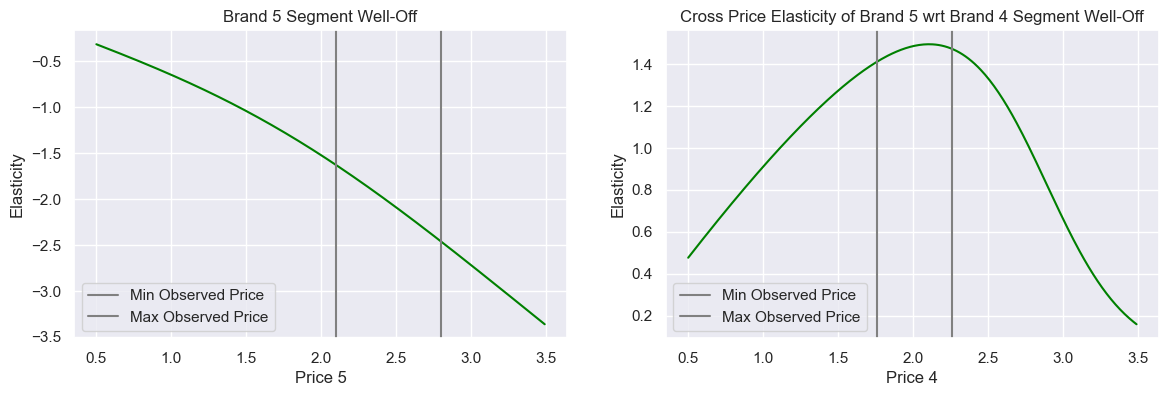

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color='green')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')
axs[0].axvline(x=2.10, color='grey', label='Min Observed Price')
axs[0].axvline(x=2.80, color='grey', label='Max Observed Price')
axs[0].legend()

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'green')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')
axs[1].axvline(x=1.76, color='grey', label='Min Observed Price')
axs[1].axvline(x=2.26, color='grey', label='Max Observed Price')
axs[1].legend()


for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

**Brand 5 – Well-Off Segment: Elasticity Insights**
For Brand 5 within the well-off segment, we observe that price-elastic—meaning customers are sensitive to changes in its price. This supports our earlier observation from the Average Brand Choice by Segment table, where this segment showed a stronger preference for Brand 4 during the positioning analysis.

In terms of cross-price elasticity, Brand 4 behaves as a substitute for Brand 5 up to a price point of approximately 2.30. Specifically, for every 1% discount Brand 4 offers, Brand 5's purchase probability decreases by 1.5%.

On the own-price elasticity side, Brand 5 sees a significant response: for every 1% reduction in its own price, purchase probability increases by 1.95%.

Hypothetically, if Brand 5 aims to fully offset the competitive effect of Brand 4’s discounting (maintain customer retention), it would need to adjust its price accordingly. Based on the elasticities, a 1% price cut from Brand 4 would require Brand 5 to reduce its price by approximately 0.75% to remain competitive.



### $\color{cyan}{\text{Low Oportunities}}$

In [98]:
brand_choice_seg0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_seg0 = brand_choice_seg0[brand_choice_seg0['Segment'] == 0]
brand_choice_seg0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
291,200000004,55,1,5,1,0,0,1.39,1.90,1.91,...,37,1,119602,0,0,0,True,False,False,False
303,200000004,162,1,5,1,0,0,1.39,1.90,1.94,...,37,1,119602,0,0,0,True,False,False,False
304,200000004,175,1,5,1,5,1,1.48,1.50,1.97,...,37,1,119602,0,0,0,True,False,False,False
306,200000004,184,1,5,1,0,0,1.46,1.88,1.97,...,37,1,119602,0,0,0,True,False,False,False
307,200000004,194,1,5,2,5,1,1.35,1.56,1.99,...,37,1,119602,0,0,0,True,False,False,False


In [99]:
Y = brand_choice_seg0['Brand']
brand_choice_seg0 = pd.get_dummies(brand_choice_seg0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_seg0[features]
model_brand_choice_seg0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_seg0.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_seg0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### $\color{cyan}{\text{Own-Brand Price Elasticity}}$

In [100]:
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_seg0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_seg0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_seg0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_seg0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_seg0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


### $\color{cyan}{\text{Cross-Brand Price Elasticity}}$

In [101]:
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_seg0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_seg0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_seg0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_seg0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_seg0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


### $\color{red}{\text{Standard}}$

In [102]:
brand_choice_seg1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_seg1 = brand_choice_seg1[brand_choice_seg1['Segment'] == 1]

In [103]:
Y = brand_choice_seg1['Brand']
brand_choice_seg1 = pd.get_dummies(brand_choice_seg1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_seg1[features]
model_brand_choice_seg1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_seg1.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_seg1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### $\color{red}{\text{Own-Brand Price Elasticity}}$

In [104]:
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_seg1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_seg1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_seg1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_seg1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_seg1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


### $\color{red}{\text{Cross-Brand Price Elasticity}}$

In [105]:
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_seg1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_seg1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_seg1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_seg1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_seg1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


### $\color{magenta}{\text{Workaholics}}$

In [106]:
brand_choice_seg2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_seg2 = brand_choice_seg2[brand_choice_seg2['Segment'] == 2]

In [107]:
Y = brand_choice_seg2['Brand']
brand_choice_seg2 = pd.get_dummies(brand_choice_seg2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_seg2[features]
model_brand_choice_seg2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_seg2.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_seg2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### $\color{magenta}{\text{Own-Brand Price Elasticity}}$

In [108]:
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_seg2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_seg2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_seg2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_seg2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_seg2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


### $\color{magenta}{\text{Cross-Brand Price Elasticity}}$

In [109]:
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_seg2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_seg2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_seg2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_seg2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_seg2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


,Price points,Mean PE,PE Segment 0,PE Segment 1,PE Segment 2,PE Segment 3,Elasticity Promotion 1,Elasticity Promotion 0,Brand_5,Brand_5_Cross_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand_5_Cross_2,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096293,-0.090957,-0.178803,-0.075453,-0.159548,-0.125746,-0.195663,-0.049056,0.332011,-0.003443,0.251696,-0.128382,0.147007,-0.037207,0.201561,0.481450,-0.312851,0.476139
1,0.51,-0.100355,-0.095114,-0.184786,-0.078749,-0.164533,-0.129862,-0.201785,-0.050617,0.337287,-0.003626,0.254904,-0.131602,0.149083,-0.038269,0.204051,0.489790,-0.319180,0.485299
2,0.52,-0.104545,-0.099417,-0.190886,-0.082154,-0.169602,-0.134057,-0.208009,-0.052207,0.342507,-0.003818,0.258041,-0.134851,0.151128,-0.039345,0.206486,0.498056,-0.325517,0.494442
3,0.53,-0.108864,-0.103872,-0.197106,-0.085671,-0.174756,-0.138333,-0.214336,-0.053827,0.347668,-0.004018,0.261107,-0.138130,0.153140,-0.040438,0.208866,0.506247,-0.331863,0.503569
4,0.54,-0.113317,-0.108483,-0.203446,-0.089304,-0.179996,-0.142689,-0.220768,-0.055478,0.352773,-0.004227,0.264102,-0.141438,0.155122,-0.041545,0.211191,0.514361,-0.338218,0.512679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.008764,-9.171989,-5.615645,-8.350661,-4.643889,-4.861423,-4.983033,-3.231573,0.162234,-3.726558,0.022619,-3.330102,0.077415,-2.143149,0.057307,0.035875,-3.310418,0.182041
296,3.46,-8.034007,-9.199820,-5.634338,-8.377096,-4.660629,-4.879624,-4.999939,-3.247767,0.160334,-3.738479,0.022187,-3.346148,0.076738,-2.159071,0.056721,0.035172,-3.323607,0.175974
297,3.47,-8.059216,-9.227625,-5.653006,-8.403492,-4.677346,-4.897794,-5.016824,-3.263928,0.158448,-3.750369,0.021764,-3.362160,0.076066,-2.175039,0.056139,0.034482,-3.336797,0.170081
298,3.48,-8.084392,-9.255406,-5.671651,-8.429848,-4.694040,-4.915934,-5.033690,-3.280058,0.156577,-3.762231,0.021347,-3.378138,0.075397,-2.191049,0.055561,0.033805,-3.349986,0.164359


Text(0.5, 0, 'Price 4')

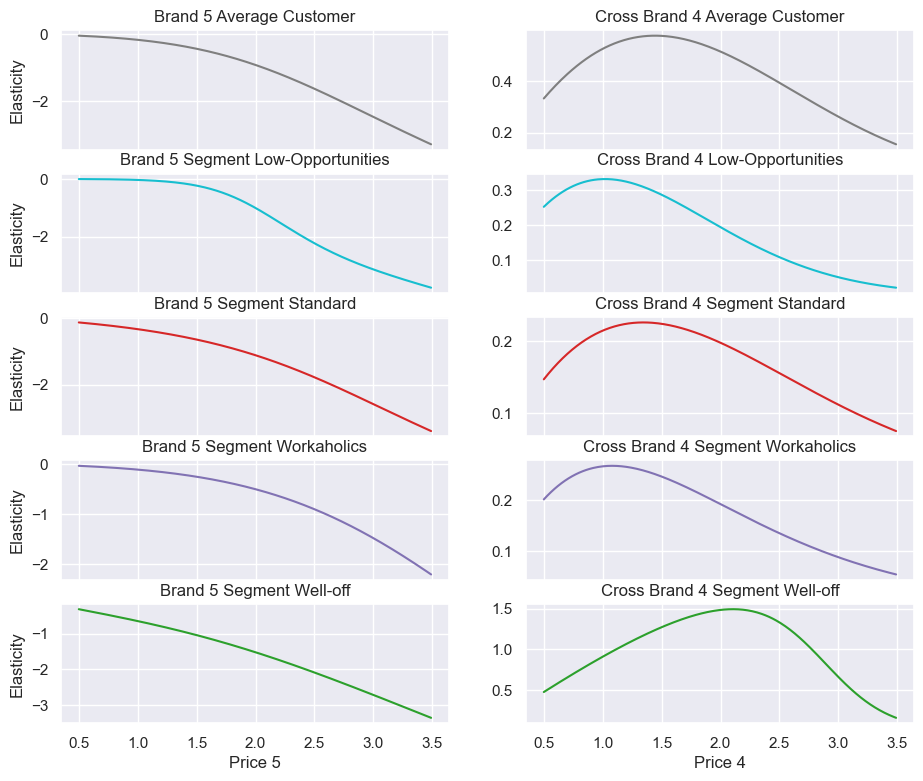

In [110]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0, 'tab:cyan')
ax2[0].set_title('Brand 5 Segment Low-Opportunities')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0, 'tab:cyan')
ax2[1].set_title('Cross Brand 4 Low-Opportunities')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:red')
ax3[0].set_title('Brand 5 Segment Standard')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:red')
ax3[1].set_title('Cross Brand 4 Segment Standard')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, color='m')
ax4[0].set_title('Brand 5 Segment Workaholics')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, color='m')
ax4[1].set_title('Cross Brand 4 Segment Workaholics')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:green')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:green')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')

In the **Standard** segment, consumers show consistent price elasticity across the entire observed price range. This indicates an opportunity to increase Brand 5's market share within this group through targeted price reductions. However, any pricing strategy should consider potential spillover effects on other segments, particularly those more sensitive to pricing changes.

In contrast, the **Low-Opportunities** segment is the most price-sensitive overall. While they begin relatively inelastic at lower price levels, they quickly become highly elastic once prices exceed $1.40. Despite this, our descriptive analysis suggests that Brands 4 and 5 have very low penetration within this group. For more effective targeting, additional research is needed to understand their price thresholds and brand preferences—it is likely that current pricing is simply out of reach for this segment.

From a strategic standpoint, the segments that warrant closer attention are Workaholics and Well-Off, as they are the primary consumers of Brands 4 and 5:

* The **Workaholics** segment is the least price-elastic of all groups. They remain largely unaffected by price changes, suggesting strong brand loyalty. However, they also exhibit the lowest negative purchase probability at the highest price point.

* As noted earlier, the **Well-Off** segment is more price-elastic and leans toward Brand 4. A modest reduction in Brand 5’s price could help attract some of these consumers without negatively impacting the Workaholic segment, which is less reactive to such changes.

# Purchase Quantity

## Price Elasticity of Pruchase Quantity

Let’s start by finding the information where a purchase happened and getting how many units were acquired in each instance.

In [111]:
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,False,False,True,False
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,False,False,True,False
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,False,False,True,False
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,False,False,True,False
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,False,False,True,False


In [112]:
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns=['Brand'], prefix='Brand',prefix_sep='_')
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,0.128091,0.045430,0.357289,0.385162,40.346905,1.151045,126706.452043,0.845471,0.797513,1.520358
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,0.334203,0.208252,0.479217,0.486650,12.346284,0.634625,39935.109358,0.633840,0.810358,1.126410
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,0.000000,0.000000,0.000000,0.000000,31.000000,1.000000,102723.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,0.000000,0.000000,0.000000,0.000000,37.000000,1.000000,122895.000000,1.000000,1.000000,2.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,0.000000,0.000000,1.000000,1.000000,49.000000,2.000000,147967.000000,1.000000,1.000000,2.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000,3.000000


In [113]:
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [114]:
# How much was the pruchase of the product?
df_purchase_quantity['Price_Incidence'] =  (df_purchase_quantity['Brand_1']*df_purchase_quantity['Price_1']+
                                            df_purchase_quantity['Brand_2']*df_purchase_quantity['Price_2']+
                                            df_purchase_quantity['Brand_3']*df_purchase_quantity['Price_3']+
                                            df_purchase_quantity['Brand_4']*df_purchase_quantity['Price_4']+
                                            df_purchase_quantity['Brand_5']*df_purchase_quantity['Price_5'])

In [115]:
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1']*df_purchase_quantity['Promotion_1']+
                                               df_purchase_quantity['Brand_2']*df_purchase_quantity['Promotion_2']+
                                               df_purchase_quantity['Brand_3']*df_purchase_quantity['Promotion_3']+
                                               df_purchase_quantity['Brand_4']*df_purchase_quantity['Promotion_4']+
                                               df_purchase_quantity['Brand_5']*df_purchase_quantity['Promotion_5'])

In [116]:
# selecting variables to model
new_features = ['Price_Incidence','Promotion_Incidence']

## Model Estimation. (Linear Regression)

In [117]:
y = df_purchase_quantity['Quantity']
y

6         2
11        1
19        2
24        1
29        3
         ..
58621     6
58648    12
58674     7
58687     6
58691     3
Name: Quantity, Length: 14638, dtype: int64

In [118]:
x = df_purchase_quantity[new_features]
x

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [119]:
model_quantity = LinearRegression()
model_quantity.fit(x,y)

LinearRegression()

In [120]:
model_quantity.coef_

array([-0.8173651 , -0.10504673])

With our coefficients, for every additional $ unit in `Price_Incidence`, the client will buy -0.81 less quantity, and if there was a `Promotion_Incidence`, then they will buy -0.10 units.

Sounds counterintuitive, but people will buy less if there's a promotion. This can be because we oversimplified our models and we are missing information. Maybe it is related to the experience of the average customer and not a specific segment, or the promotions are pushing clients to try a new brand they would normally not buy.



## Price Elasticity Estimation

In [132]:
df_price_elasticity_qty = pd.DataFrame(index= np.arange(price_range.size))
df_price_elasticity_qty['Price_Incidence'] = price_range
df_price_elasticity_qty['Promotion_Incidence'] = 1

### Price elasticity of purchase quantity

$ E = \beta \cdot \frac{\text{Price}}{\text{Quantity(purchase)}} $



In [133]:
beta_quantity = model_quantity.coef_[0]
beta_quantity


np.float64(-0.817365101668505)

### Getting Results For Price With Promotion

In [134]:
predict_quantity = model_quantity.predict(df_price_elasticity_qty)

In [135]:
price_elasticity_qty_promotion_yes = beta_quantity*price_range / predict_quantity

In [136]:
df_price_elasticities['PE_Quantity_promotion_1'] = price_elasticity_qty_promotion_yes
df_price_elasticities

,Price points,Mean PE,PE Segment 0,PE Segment 1,PE Segment 2,PE Segment 3,Elasticity Promotion 1,Elasticity Promotion 0,Brand_5,Brand_5_Cross_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand_5_Cross_2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_promotion_1
0,0.50,-0.096293,-0.090957,-0.178803,-0.075453,-0.159548,-0.125746,-0.195663,-0.049056,0.332011,-0.003443,0.251696,-0.128382,0.147007,-0.037207,0.201561,0.481450,-0.312851,0.476139,-0.102157
1,0.51,-0.100355,-0.095114,-0.184786,-0.078749,-0.164533,-0.129862,-0.201785,-0.050617,0.337287,-0.003626,0.254904,-0.131602,0.149083,-0.038269,0.204051,0.489790,-0.319180,0.485299,-0.104413
2,0.52,-0.104545,-0.099417,-0.190886,-0.082154,-0.169602,-0.134057,-0.208009,-0.052207,0.342507,-0.003818,0.258041,-0.134851,0.151128,-0.039345,0.206486,0.498056,-0.325517,0.494442,-0.106679
3,0.53,-0.108864,-0.103872,-0.197106,-0.085671,-0.174756,-0.138333,-0.214336,-0.053827,0.347668,-0.004018,0.261107,-0.138130,0.153140,-0.040438,0.208866,0.506247,-0.331863,0.503569,-0.108954
4,0.54,-0.113317,-0.108483,-0.203446,-0.089304,-0.179996,-0.142689,-0.220768,-0.055478,0.352773,-0.004227,0.264102,-0.141438,0.155122,-0.041545,0.211191,0.514361,-0.338218,0.512679,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.008764,-9.171989,-5.615645,-8.350661,-4.643889,-4.861423,-4.983033,-3.231573,0.162234,-3.726558,0.022619,-3.330102,0.077415,-2.143149,0.057307,0.035875,-3.310418,0.182041,-1.774292
296,3.46,-8.034007,-9.199820,-5.634338,-8.377096,-4.660629,-4.879624,-4.999939,-3.247767,0.160334,-3.738479,0.022187,-3.346148,0.076738,-2.159071,0.056721,0.035172,-3.323607,0.175974,-1.788634
297,3.47,-8.059216,-9.227625,-5.653006,-8.403492,-4.677346,-4.897794,-5.016824,-3.263928,0.158448,-3.750369,0.021764,-3.362160,0.076066,-2.175039,0.056139,0.034482,-3.336797,0.170081,-1.803124
298,3.48,-8.084392,-9.255406,-5.671651,-8.429848,-4.694040,-4.915934,-5.033690,-3.280058,0.156577,-3.762231,0.021347,-3.378138,0.075397,-2.191049,0.055561,0.033805,-3.349986,0.164359,-1.817766


Text(0, 0.5, 'Elasticity')

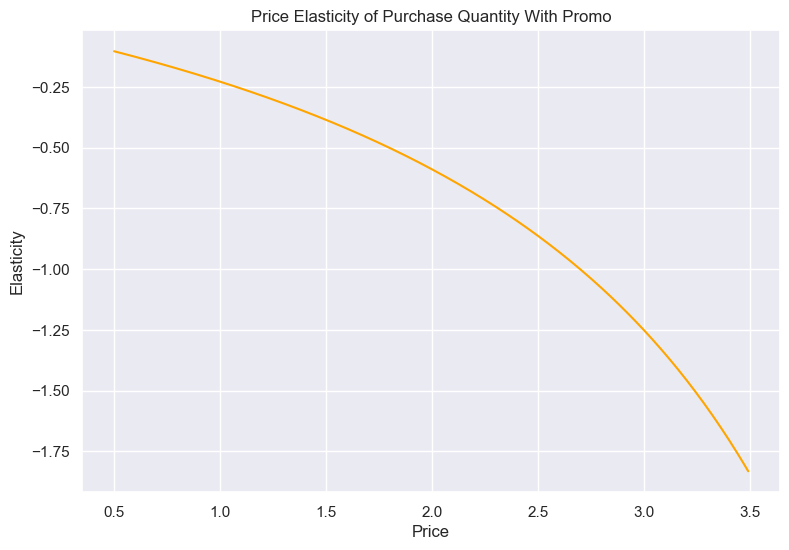

In [153]:
plt.figure(figsize= (9,6))
plt.plot(price_range,price_elasticity_qty_promotion_yes, color='orange')
plt.title('Price Elasticity of Purchase Quantity With Promo')
plt.xlabel('Price')
plt.ylabel('Elasticity')


### Getting Results for Price With No Promo

In [ ]:
df_price_elasticity_qty['Promotion_Incidence'] = 0

predict_quantity = model_quantity.predict(df_price_elasticity_qty)

price_elasticity_qty_promotion_no = beta_quantity*price_range / predict_quantity

df_price_elasticities['PE_Quantity_promotion_0'] = price_elasticity_qty_promotion_no
df_price_elasticities

Text(0, 0.5, 'Elasticity')

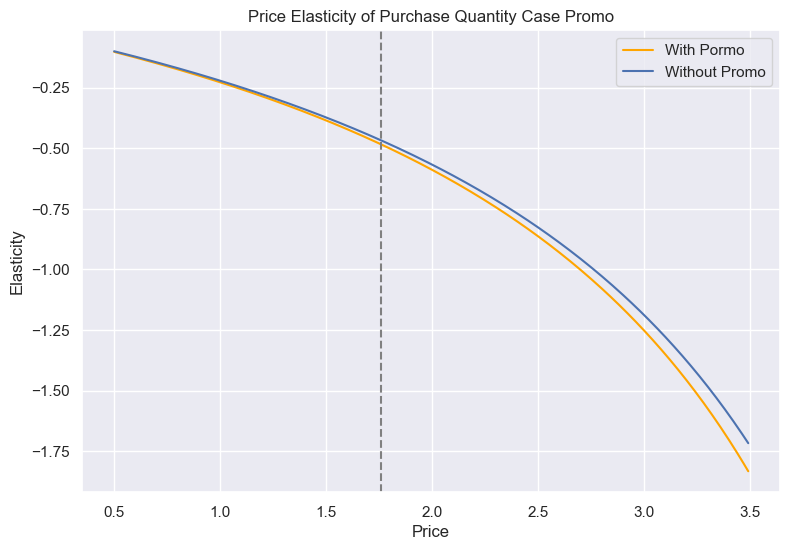

In [157]:
plt.figure(figsize= (9,6))
plt.plot(price_range,price_elasticity_qty_promotion_yes, label = 'With Pormo',color='Orange')
plt.plot(price_range,price_elasticity_qty_promotion_no, label = 'Without Promo')

plt.legend()
plt.axvline(x= 1.76, color= 'grey', linestyle= '--', label= 'break point')
plt.title('Price Elasticity of Purchase Quantity Case Promo')
plt.xlabel('Price')
plt.ylabel('Elasticity')


In this instance, when there is a promotion, customers are slightly more elastic overall. However, in general terms, they are inelastic among all prices until $1.70, and promotions do not appear to be a significant factor since the two lines largely overlap until they reach the upper prices, beyond the maximum observable price.

It is possible that the variables included in our model do not possess predictive power (Price and promotion changes do not seem to influence the customer’s purchase quantity decision), or we may be estimating based on the average customer rather than dividing it by the segments we previously identified.

For future analysis, we could calculate the price elasticity by brand and then filter the information to visualize only brand 5.